In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [101]:
data = pd.read_csv('winequality-red.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [102]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


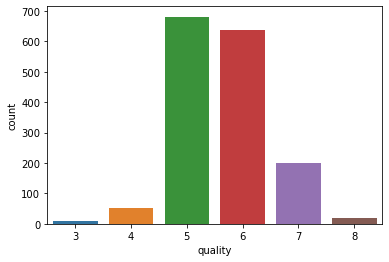

In [87]:
sns.countplot(data['quality'])
plt.show()

In [93]:
data['quality'] = data['quality'].apply(lambda x: 1 if x>=6 else 0)

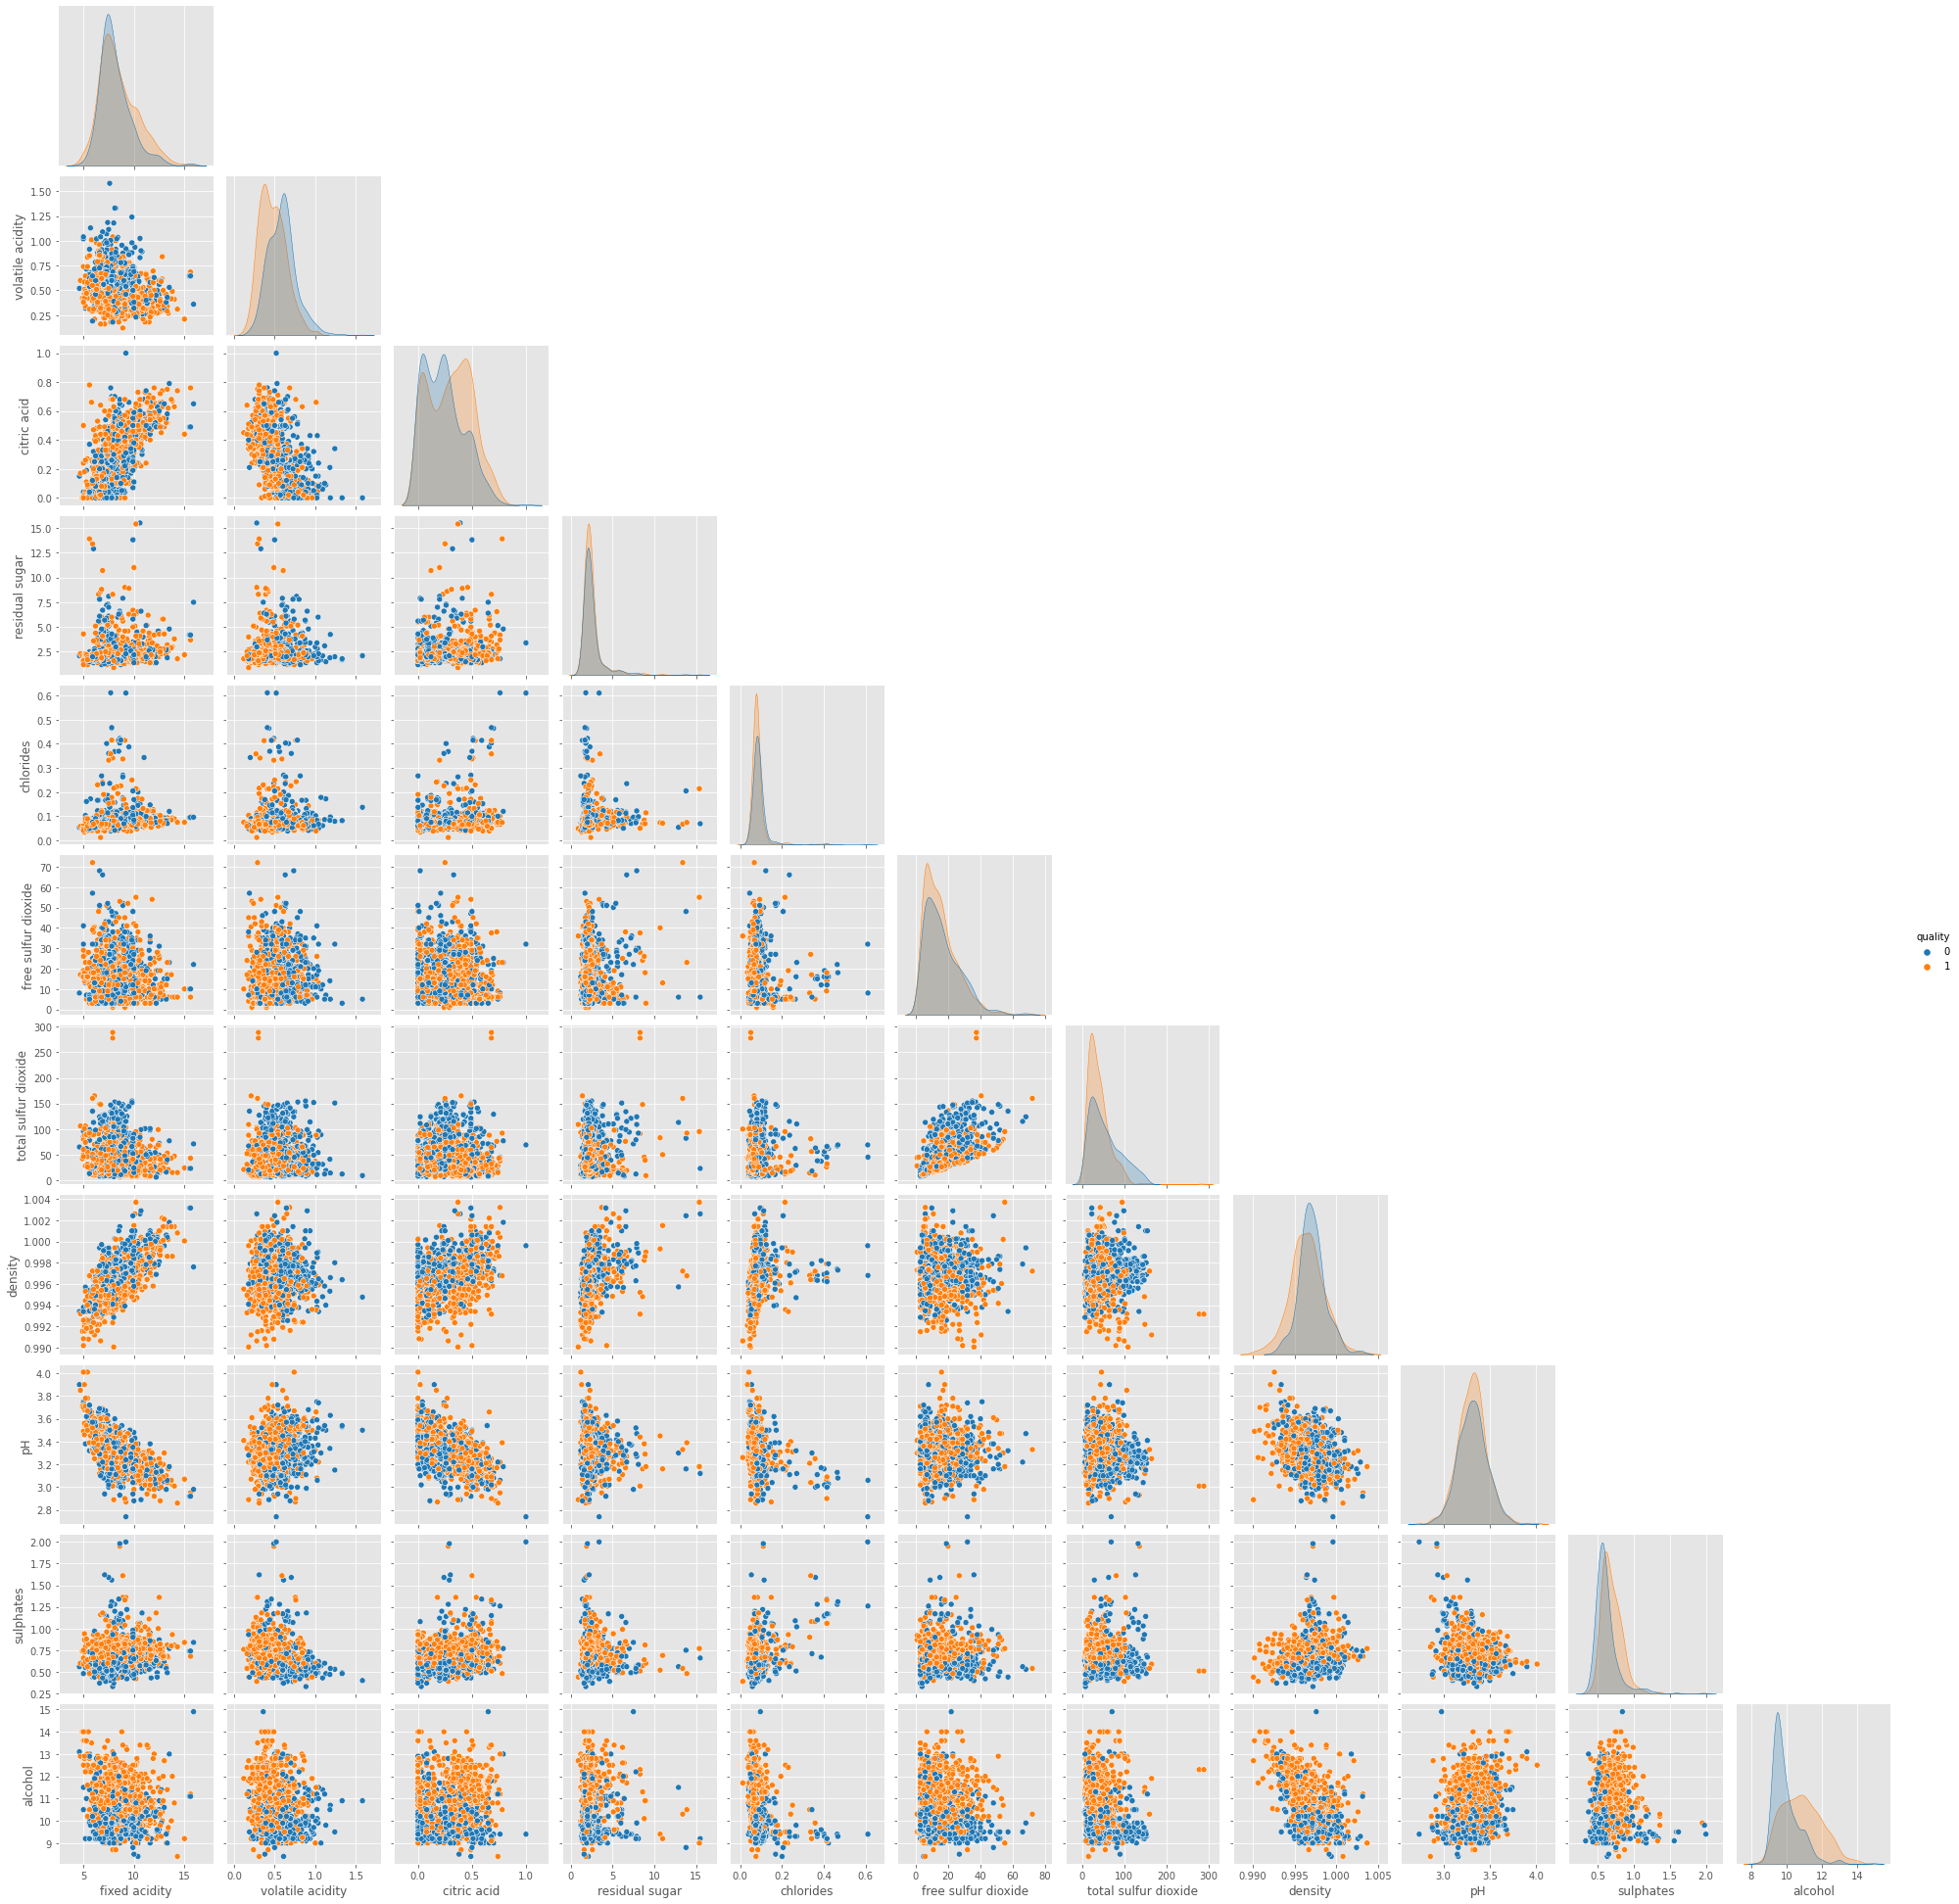

In [94]:
sns.pairplot(data, hue='quality', diag_kind='kde', corner=True, palette = "tab10")

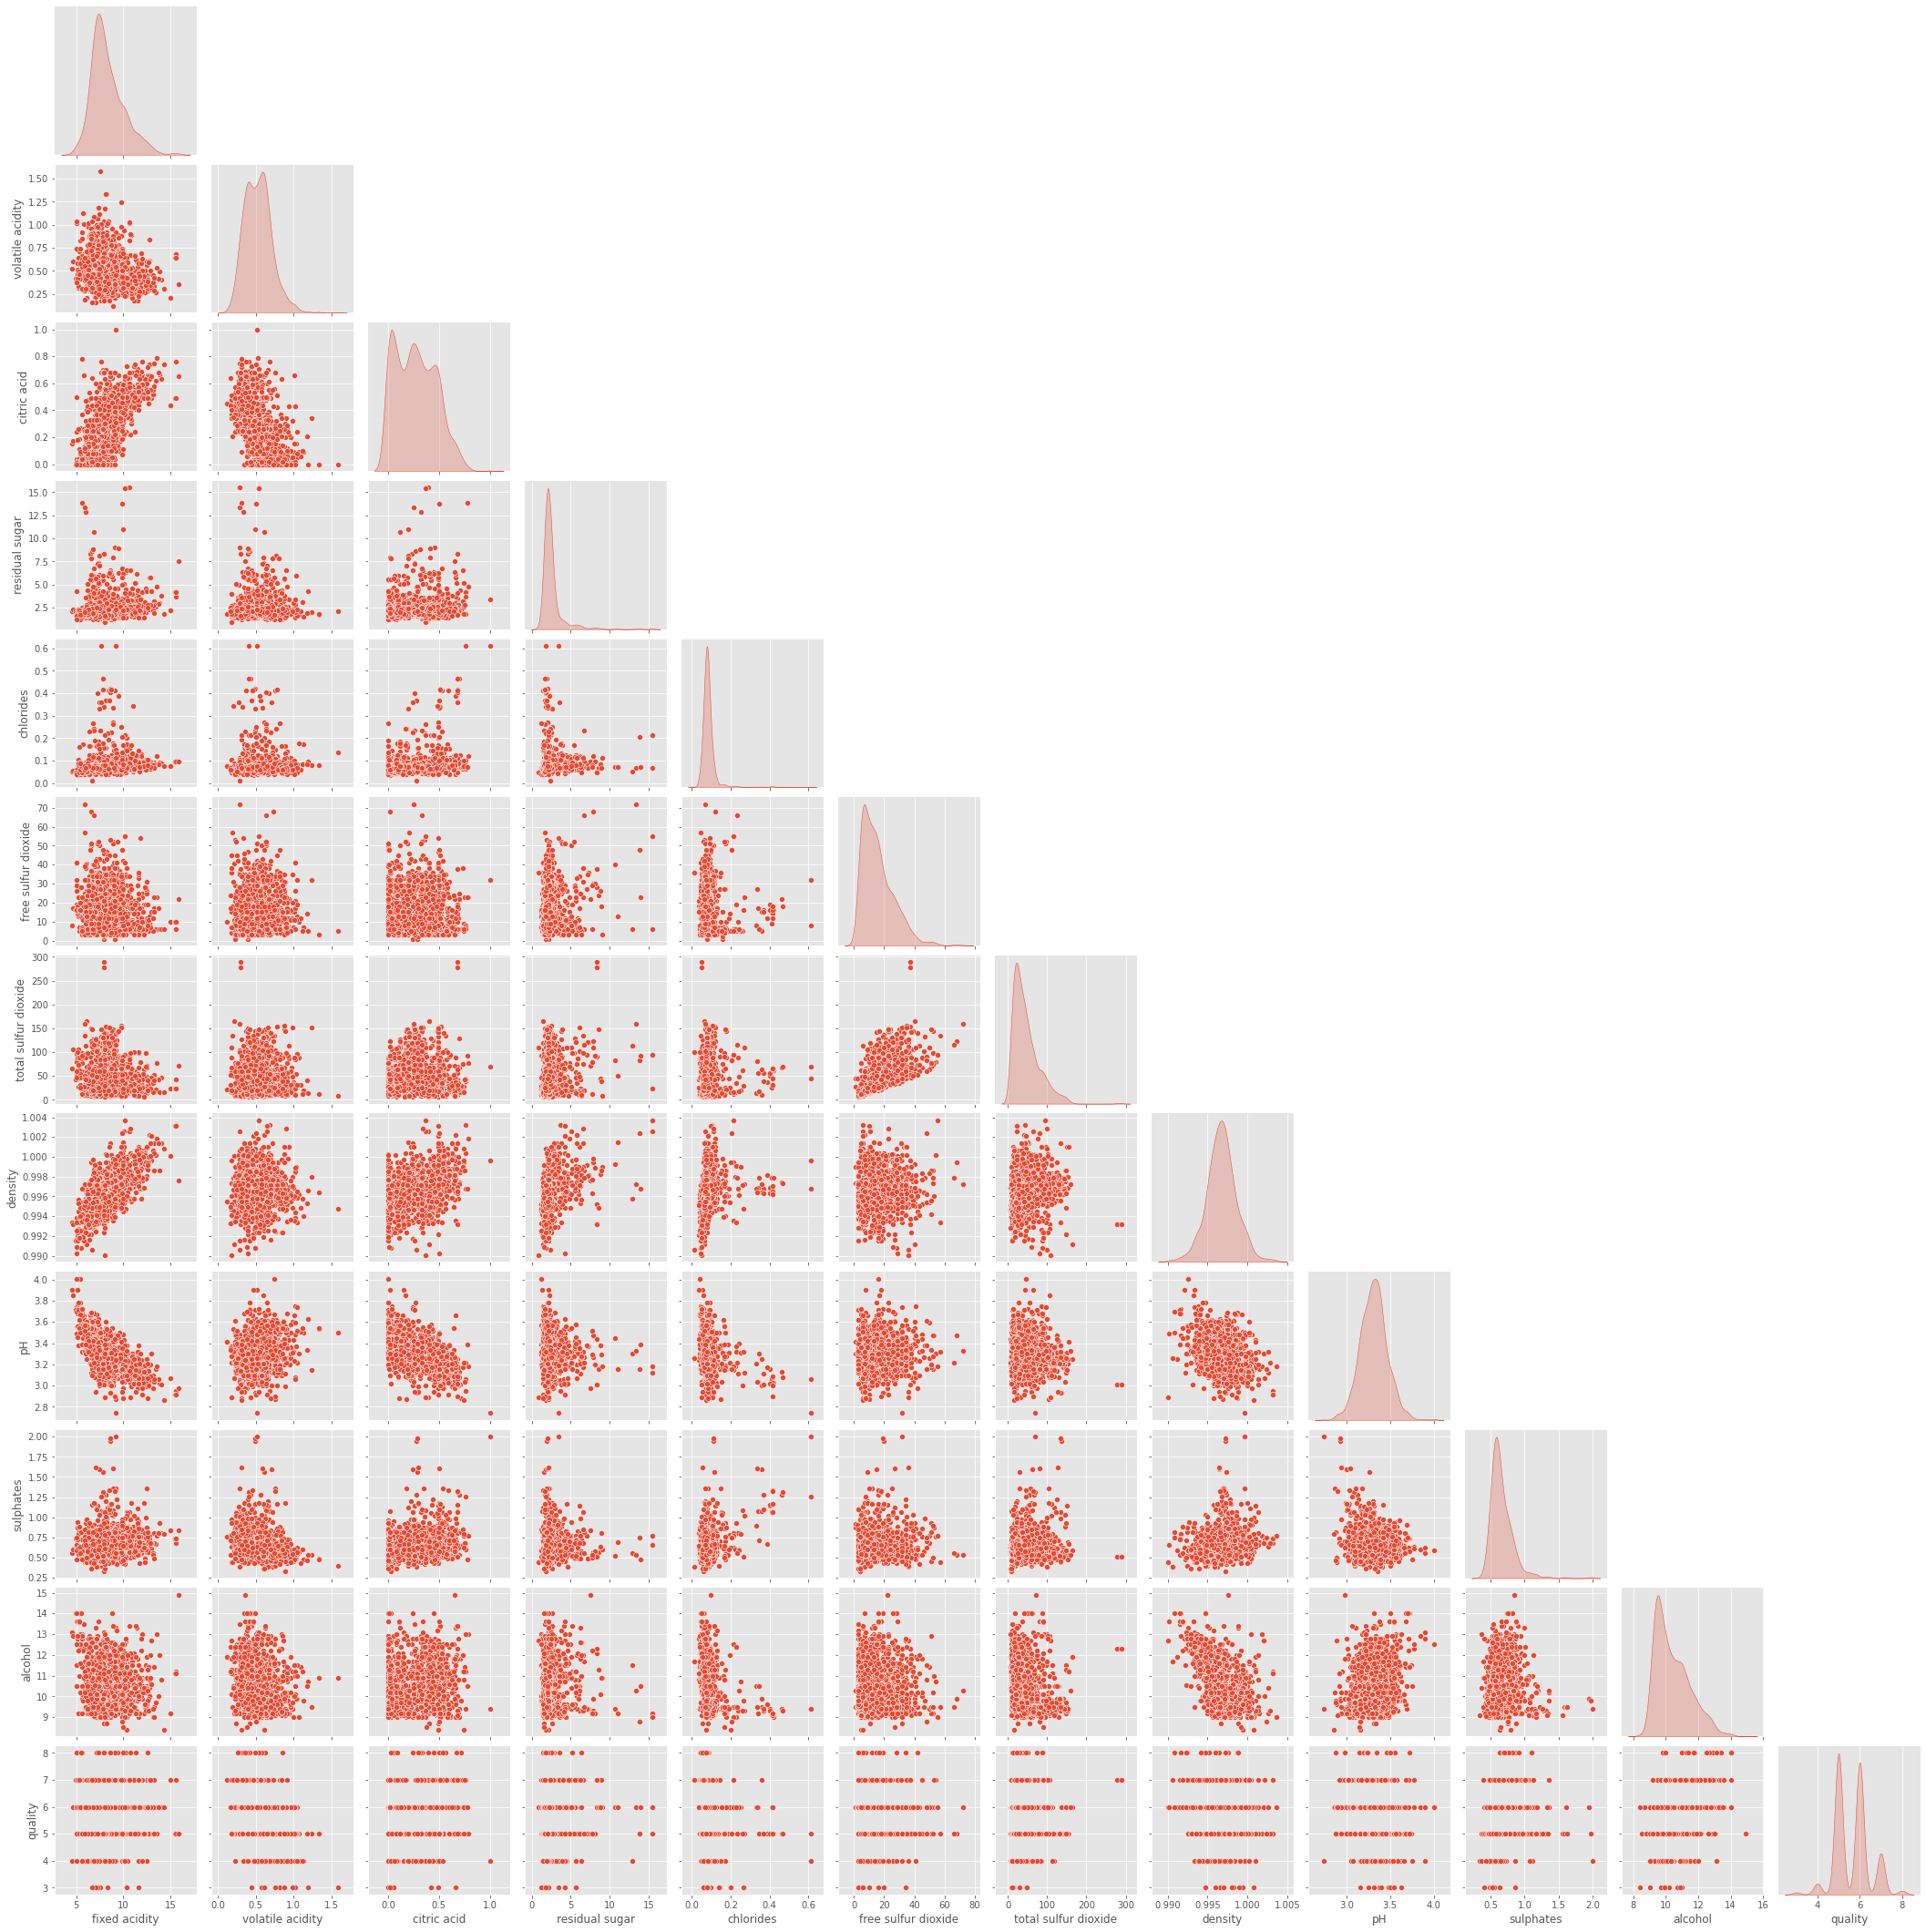

In [120]:
sns.pairplot(data, diag_kind='kde', corner=True, palette = "tab10")

/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


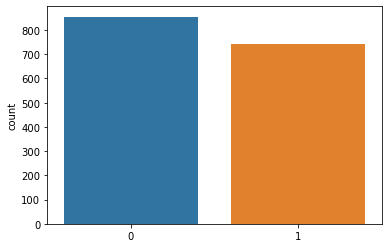

In [70]:
x=data.drop('quality', axis=1)
y=data['quality']

# feature engineering
x['f_v ratio'] = x['fixed acidity']/x['volatile acidity']
x['f ratio'] = x['free sulfur dioxide']/x['total sulfur dioxide']

x.head()

In [71]:
print(label.classes_)
print(label.transform(label.classes_))

['high' 'low']
[0 1]


In [72]:
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,f_v ratio,f ratio
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,18.236316,0.382311
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,9.275158,0.154799
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,4.807692,0.022727
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,11.653543,0.259259
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,15.223881,0.375000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,22.702703,0.484848
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,74.166667,0.857143


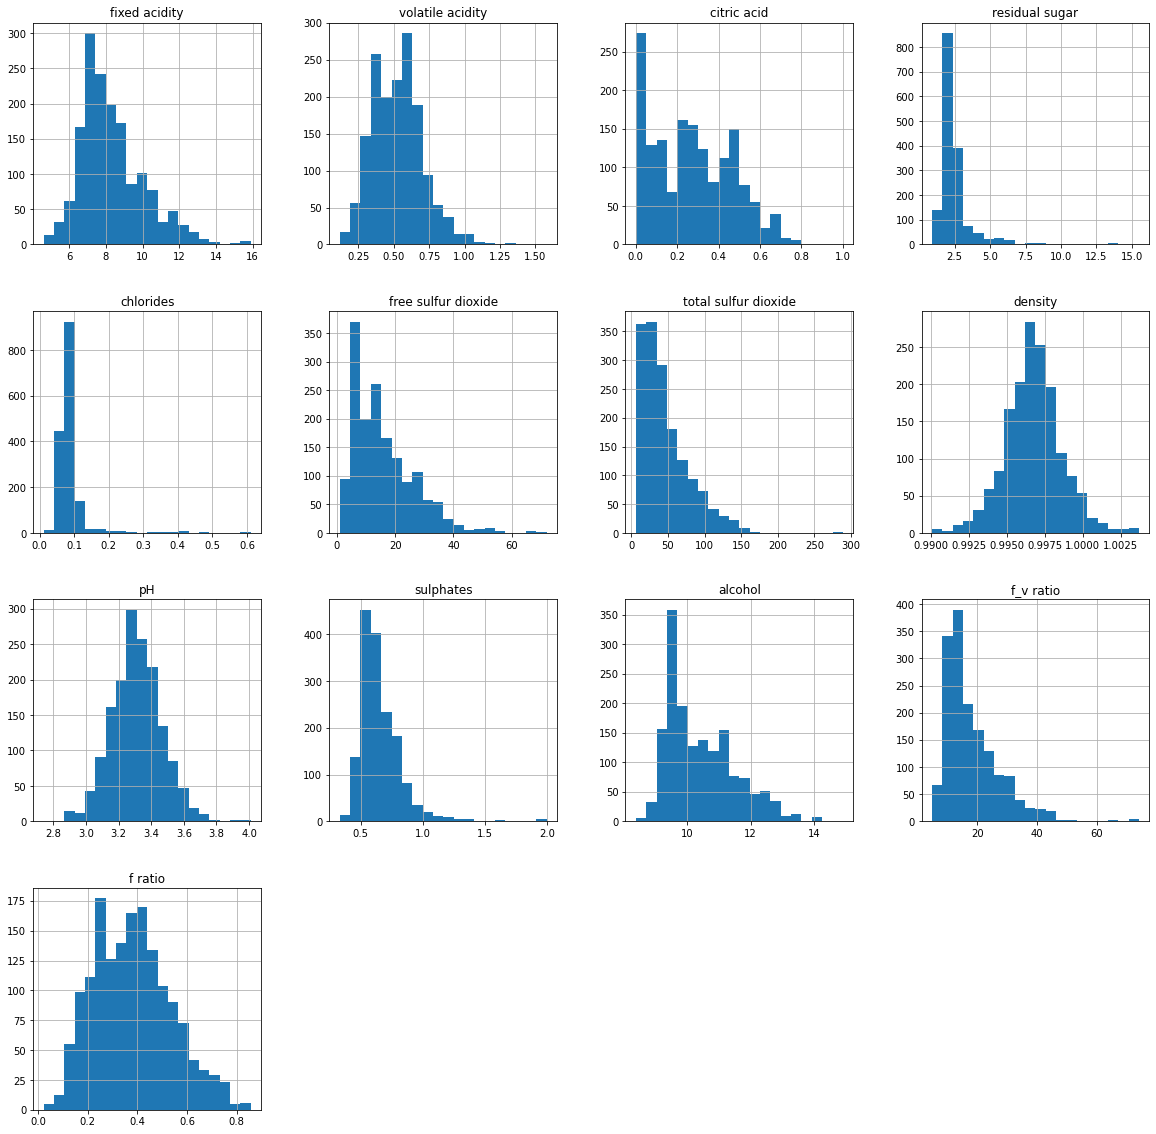

In [73]:
x.hist(bins=20, figsize=(20,20))
plt.show()

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=1)
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,f_v ratio,f ratio
425,6.6,0.84,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,7.857143,0.666667
146,5.8,0.68,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,8.529412,0.223404
541,9.5,0.46,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0,20.652174,0.294118
995,7.7,0.60,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,12.833333,0.463415
1584,6.7,0.32,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,20.937500,0.705882


In [75]:
# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = x_train.columns
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=columns)
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,f_v ratio,f ratio
0,1.883988,-0.278103,0.664744,-0.822858,0.089813,-0.955685,-0.566918,0.160372,-1.588950,-0.027954,-0.370343,0.638674,-1.091128
1,-0.657806,0.525569,-1.369745,-0.176090,-0.493286,-0.764950,-0.027730,-1.802510,0.089223,-0.886522,1.302170,-0.721252,-1.354277
2,2.634973,-0.139539,1.447240,0.183226,-0.336298,-0.860317,-0.686737,1.785554,-1.454696,0.156025,0.450135,0.785086,-0.586759
3,-0.888878,0.802697,-1.421911,-0.463542,-0.156883,0.570190,-0.237414,0.144542,0.626238,0.523982,-0.685911,-0.876657,1.188976
4,-0.426734,1.190677,-1.421911,-0.463542,0.291654,-0.955685,-1.046196,-0.805239,0.357730,-0.395912,0.544806,-0.863808,0.771156


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, classification_report, confusion_matrix

logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_predict = logReg.predict(x_test)

print(accuracy_score(y_test, y_predict))

print(classification_report(y_true = y_test, y_pred = y_predict))

confusion_matrix(y_test, y_predict)

0.721875
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       171
           1       0.70      0.70      0.70       149

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



array([[127,  44],
       [ 45, 104]])

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 7, 9]
# Minimum number of samples required to split a node
min_samples_split = [50, 100, 200]

# Create the grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=0, n_jobs = -1, 
                       scoring='roc_auc')
# Fit the grid search model
rf_grid.fit(x_train, y_train)


rfc = rf_grid.best_estimator_
y_pred_rfc = rfc.predict(x_test)

print(accuracy_score(y_test, y_pred_rfc))

print(classification_report(y_true = y_test, y_pred = y_pred_rfc))

confusion_matrix(y_test, y_pred_rfc)

0.76875
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       171
           1       0.73      0.79      0.76       149

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



array([[128,  43],
       [ 31, 118]])

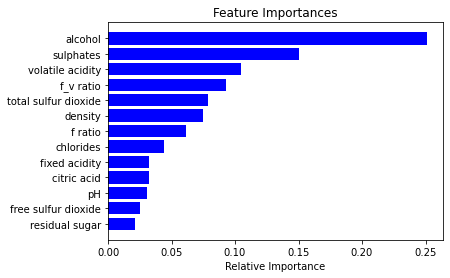

In [82]:
features = x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

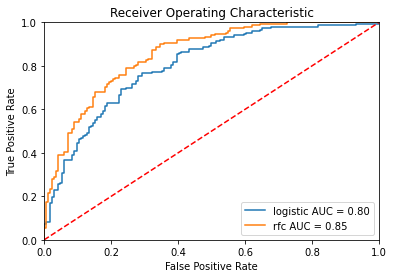

In [81]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logReg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'logistic AUC = %0.2f' % roc_auc)
probs = rfc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'rfc AUC = %0.2f' % roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()